<a href="https://colab.research.google.com/github/LucasRobles2323/Tareas-MetodosNumericos/blob/main/Tarea2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Integrantes:

* Felipe Bravo

* Vicente Becerra

* Gerald Espinoza

* Lucas Robles

# *Funciones para obtener super-índices y sub-índices en los print*

`EJECUTAR PRIMERO.`

In [1]:
def get_super(x): 
    normal = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+-=()"
    super_s = "ᴬᴮᶜᴰᴱᶠᴳᴴᴵᴶᴷᴸᴹᴺᴼᴾQᴿˢᵀᵁⱽᵂˣʸᶻᵃᵇᶜᵈᵉᶠᵍʰᶦʲᵏˡᵐⁿᵒᵖ۹ʳˢᵗᵘᵛʷˣʸᶻ⁰¹²³⁴⁵⁶⁷⁸⁹⁺⁻⁼⁽⁾"
    res = x.maketrans(''.join(normal), ''.join(super_s)) 
    return x.translate(res) 

def get_sub(x): 
    normal = "ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789+-=()"
    sub_s = "ₐ₈CDₑբGₕᵢⱼₖₗₘₙₒₚQᵣₛₜᵤᵥwₓᵧZₐ♭꜀ᑯₑբ₉ₕᵢⱼₖₗₘₙₒₚ૧ᵣₛₜᵤᵥwₓᵧ₂₀₁₂₃₄₅₆₇₈₉₊₋₌₍₎"
    res = x.maketrans(''.join(normal), ''.join(sub_s)) 
    return x.translate(res) 

#**PREGUNTA 1**

---

##Regresión Lineal Simple y Múltiple:

> Una universidad en EEUU quiere hacer un estudio de como se relacionan las notas de las $3$ pruebas del semestre con la nota final del examen. Para ello cuentan con $25$ datos del semestre pasado. Encontrar el modelo de regresión lineal múltiple para realizar esta tarea. (Ejemplo real y se llama “Test Scores for General Psychology”.  Descargue el archivo mlr03.xls). 

  * Primero realice una regresión lineal simple, en donde utilice la nota de la primera prueba como variable independiente y la nota del examen como la dependiente. Muestre en un gráfico los datos y la recta que se genera.

  * Luego implemente la regresión lineal múltiple con todos los datos.

> Verifique la calidad de los modelos calculando la medida de desempeño $r^2$. Debe calcular la métrica de desempeño para cada uno de los problemas.

---

###**NOTA**

Para revisar esta pregunta se debe utilizar el google colab para obtener el archivo CSV mediante un repositorio y el uso de directorio

###**Obtener Datos Excel**

In [ ]:
#Biblioteca para obtener el repositorio de Github
!pip install GitPython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 182 kB 4.9 MB/s 
     |████████████████████████████████| 62 kB 495 kB/s 


In [ ]:
import git

def ObtenerDatos(exam1, exam2, exam3, final):
  # Comando para clonar el repositorio en una carpeta
  # NOTA: Una vez que se clone la carpeta, debe comentar la siguiten sentencia
  git.Git("/content").clone("https://github.com/vicho-bece/datos_excel.git")

  # Lectura de archivo csv
  with open("/content/datos_excel/mlr03.csv") as Excel:

  # Me salto la primera linea
    next(Excel, None)

  # Leo por lineas, obtengo los datos para cada conjuntos
    for line in Excel:
      datos = line.split(";")
      exam1.append(int(datos[0]))
      exam2.append(int(datos[1]))
      exam3.append(int(datos[2]))
      final.append(int(datos[3]))

exam1 = [] # Lista de Pruebas 1
exam2 = [] # Lista de Pruebas 2
exam3 = [] # Lista de Pruebas 3
final = [] # Lista de Examenes Finales
ObtenerDatos(exam1, exam2, exam3, final)

###**Regresión Lineal Simple**


DATOS:
  Cantidad de datos = 25
  Sumatoria x =  1976
  Sumatoria y = 4051
  Sumatoria x² = 159802
  Sumatoria x*y = 326895
  a₁ = 1.8524548489068682
  a₀ = 15.621968742401123
  Sₜ = 13874.960000000005
  Sᵣ = 1456.1767911223117
  r² = 0.8950500188020497




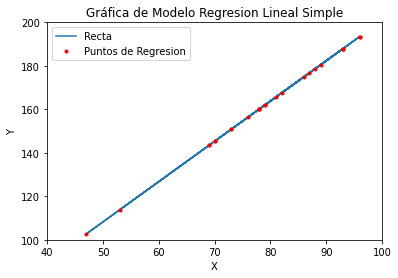

,X,f(X)
0,73,150.851173
1,93,187.900270
2,89,180.490450
3,96,193.457634
4,73,150.851173
5,53,113.802076
6,69,143.441353
7,47,102.687347
8,87,176.785541
9,79,161.965902


In [ ]:
import math
import matplotlib.pyplot as plt
import pandas as pd

# Funcion Regresion Lineal Simple
def lineal(xi, a1, a0):
  return ((xi * a1) + a0)

# Funcion para calcular la suma de una multiplicacion
def multiplicar(datos1, datos2):
  sumatoria = 0

  for i in range(0, 25):
    num = (datos1[i]) * (datos2[i])
    sumatoria = sumatoria + num

  return sumatoria  

#--------------------------------------

y_SIMPLE = [] # Lista de los 'Y' obtenidos de la funcion de Regresion Lineal Simple

x = exam1 # Variable Dependiente
y = final # Variable Independiente

n = len(x) # Cantidad de datos
sum_x = sum(x) # Sumatoria de los 'X'
sum_y = sum(y) # Sumatoria de los 'Y'
sum_x2 = multiplicar(x, x) # Sumatoria de (X^2) o (X * X)
sum_xy = multiplicar(x, y) # Sumatoria de (X * Y)

#Sumatorias en valor inicial
ST_L = 0
SR_L = 0

# Calculo de A1 y A0
A1 = (n * sum_xy - sum_x * sum_y)/(n * sum_x2 - pow(sum_x,2))
A0 = (sum_y/n) - A1 * (sum_x/n)

# Calculo de ST
for i in range(0, 25):
  diff_y = pow(y[i] - (sum_y / n), 2)
  ST_L = ST_L + diff_y

# Calculo de SR y obtengo los 'Y' de la funcion de regresion lineal simple
for i in range(0, 25):
  fun_regresion = lineal(x[i], A1, A0)
  diff_y = pow(y[i] - fun_regresion ,2)
  SR_L = SR_L + diff_y
  y_SIMPLE.append(fun_regresion)

# Medida de desempeño
R2Lineal = (ST_L - SR_L)/ST_L

# Imprimir los datos obtenidos
print("\nDATOS:");
print(f"  Cantidad de datos = {n}")
print(f"  Sumatoria x =  {sum_x}")
print(f"  Sumatoria y = {sum_y}")
print(f"  Sumatoria x{get_super('2')} = {sum_x2}")
print(f"  Sumatoria x*y = {sum_xy}")
print(f"  a{get_sub('1')} = {A1}"); 
print(f"  a{get_sub('0')} = {A0}")
print(f"  S{get_sub('t')} = {ST_L}"); 
print(f"  S{get_sub('r')} = {SR_L}")
print(f"  r{get_super('2')} = {R2Lineal}")
print("\n") 

# Genero la grafica
plt.title("Gráfica de Modelo Regresion Lineal Simple")
plt.plot(x, y_SIMPLE)
plt.plot(x, y_SIMPLE, 'r.')
plt.xlim(40, 100) # Limites dentro los que se grafica respecto al eje x
plt.ylim(100, 200) # Limites dentro los que se grafica respecto al eje y
plt.legend(["Recta", "Puntos de Regresion"])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Tabla de los 'X' y los 'Y' de la funcion de regresion lineal
tabla = pd.DataFrame({'X': x, 'f(X)': y_SIMPLE})
display(tabla)

###**Regresión Lineal Multiple**

Para calcular los coeficientes se tiene el siguiente metodo:
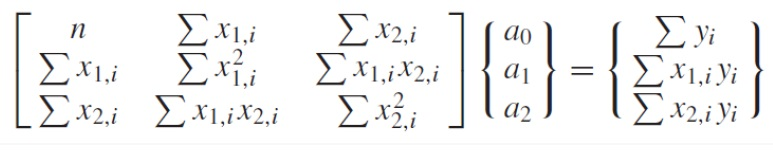

Para el uso de 4 variables en total se tiene la siguiente sistema de matrices:
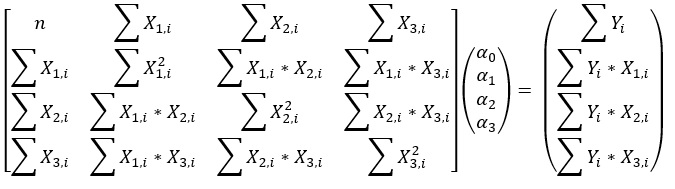

In [ ]:
import numpy as np

# Funcion de Regresion Lineal Multiple
def multiple(a0, a1, a2, a3, x1, x2, x3):
  return (a0 + a1*x1 + a2*x2 + a3*x3)

x1 = exam1 # Independiente
x2 = exam2 # Independiente
x3 = exam3 # Independiente
y = final # Dependiente

n = len(x1) # Cantidad de datos

# La sumatoria de X1, X2, X3 e Y
sumX1 = sum(x1)
sumX2 = sum(x2)
sumX3 = sum(x3)
sumY = sum(y) 

# La sumatoria de X1, X2, y X3 al cuadrado
sumX1_2 = multiplicar(x1,x1)
sumX2_2 = multiplicar(x2,x2)
sumX3_2 = multiplicar(x3,x3)

# La sumatoria de (X1 * X2), (X1 * X3) y (X2 * X3)
sumX1_X2 = multiplicar(x1,x2)
sumX1_X3 = multiplicar(x1,x3)
sumX2_X3 = multiplicar(x2,x3)

# La sumatoria de (Y * X1), (Y * X2) y (Y * X3)
sumY_X1 = multiplicar(y,x1)
sumY_X2 = multiplicar(y,x2)
sumY_X3 = multiplicar(y,x3)

# La matriz planteada
matriz = np.array([ [n, sumX1, sumX2, sumX3],[sumX1, sumX1_2, sumX1_X2, sumX1_X3], 
                   [sumX2, sumX1_X2, sumX2_2, sumX2_X3],[sumX3, sumX1_X3, sumX2_X3,sumX3_2] ])

# Matriz solucion
solucion = np.array([[sumY],[sumY_X1],[sumY_X2],[sumY_X3]])

# Calculo de los Coeficientes A0, A1, A2 Y A3
a = np.linalg.inv(matriz).dot(solucion)
A0 = float(a[0])
A1 = float(a[1])
A2 = float(a[2])
A3 = float(a[3])

# Sumatorias de ST y SR en valor inicial 0
ST_M = 0; SR_M = 0

# Calculo del ST
for i in range(0, 25):
  diff_y = pow(y[i] - (sumY / n), 2)
  ST_M = ST_M + diff_y

# Lista de los 'Y' obtenidos de la funcion de Regresion Lineal Multiple
y_MULTIPLE = []

# Calculo del SR y obtengo los Ys de la funcion de regresion
for i in range(0, 25):
  fun_regresion = multiple(A0, A1, A2, A3, x1[i], x2[i], x3[i])
  diff_y = pow(y[i] - fun_regresion ,2)
  SR_M = SR_M + diff_y
  y_MULTIPLE.append(fun_regresion)

# Calculo de R^2 (Medida de desempeño)
R2Multiple = (ST_M - SR_M)/ST_M

print("DATOS:")
print(f"  a{get_sub('0')} = {A0}"); 
print(f"  a{get_sub('1')} = {A1}")
print(f"  a{get_sub('2')} = {A2}"); 
print(f"  a{get_sub('3')} = {A3}")
print(f"  r{get_super('2')} = {R2Multiple}\n\n")

#Tabla de respaldo de los ejes e y de regresion
tabla = pd.DataFrame({f"x{get_sub('1')}": x1, f"x{get_sub('2')}": x2, f"x{get_sub('3')}" : x3, f"f(x{get_sub('1')} , x{get_sub('2')} , x{get_sub('3')})" : y_MULTIPLE})
display(tabla)

DATOS:
  a₀ = -4.33610240122016
  a₁ = 0.3559382186618336
  a₂ = 0.5425187576186659
  a₃ = 1.1674442162821776
  r² = 0.9896615789448399




,x₁,x₂,x₃,"f(x₁ , x₂ , x₃)"
0,73,80,75,152.607204
1,93,88,93,185.080115
2,89,91,90,181.781585
3,96,98,100,199.745226
4,73,66,70,139.174721
5,53,46,55,103.693918
6,69,74,77,150.263227
7,47,56,60,112.820697
8,87,79,90,174.559484
9,79,70,88,164.494421


###**Calidad de Modelos**

In [ ]:
# Se ejecuta luego de ejecutar los demas cuadros de codigo de la pregunta

print(f"El coeficiente de determinación (r{get_super('2')}) de la Regresión Lineal Simple es: {R2Lineal}")
print(f"El coeficiente de determinación múltiple (r{get_super('2')}) de la Regresión Lineal Múltiple es: {R2Multiple}")

print(f"\nEl modelo de la Regresión Lineal Múltiple posee los datos de la línea de regresión ajustada que estan mas cerca")

El coeficiente de determinación (r²) de la Regresión Lineal Simple es: 0.8950500188020497
El coeficiente de determinación múltiple (r²) de la Regresión Lineal Múltiple es: 0.9896615789448399

El modelo de la Regresión Lineal Múltiple posee los datos de la línea de regresión ajustada que estan mas cerca


#**PREGUNTA 2**

---

##Interpolación polinomial de Newton y Lagrange:
> Dados los puntos de la forma $(x;f(x))$ siguientes: $[(1;0) (2;5) (2.5;6.5) (3;7) (4;3) (5;1)]$. Calcule $f(3.4)$ usando interpolación de ordenes $1$ a $3$. Encuentre la secuencia de puntos para sus estimados para obtener el mejor resultado. Esto es, los puntos deberian estar centrados y lo mas cerca del valor desconocido.

---

###**Newton**

In [5]:
def first(valores_x, valores_y):
  firstValues = []
  for i in range(len(valores_x)-1):
    value = (valores_y[i+1] - valores_y[i]) / (valores_x[i+1] - valores_x[i])
    firstValues.append(round(value,2))
  
  return firstValues

def second(valores_x, valores_y):
  secondValues = [] 
  firstValues = first(valores_x, valores_y)
  for i in range(len(firstValues)-1):
    value = (firstValues[i+1] - firstValues[i]) / (valores_x[i+2] - valores_x[i])
    secondValues.append(round(value,2))
  
  return secondValues

def third(valores_x, valores_y):
  thirdValues = []
  secondValues = second(valores_x, valores_y)
  for i in range(len(secondValues)-1):
    value = (secondValues[i+1] - secondValues[i]) / (valores_x[i+3] - valores_x[i])
    thirdValues.append(round(value,2))
  
  return thirdValues

In [7]:
def interpolacionNewton(x,valores_x, valores_y):
  
  primerOrden = first(valores_x, valores_y)
  segundoOrden = second(valores_x, valores_y)
  tercerOrden = third(valores_x, valores_y)
  print("first:",primerOrden)
  print("second:",segundoOrden)
  print("third:", tercerOrden)

  b_1 = valores_y[0]
  b_2 = primerOrden[0]
  b_3 = segundoOrden[0]
  b_4 = tercerOrden[0]
  b_5 = (tercerOrden[1]-tercerOrden[0])/ (valores_x[len(valores_x)-1] - valores_x[0])

  print("b1:",b_1)
  print("b2:",b_2)
  print("b3:",b_3)
  print("b4:",b_4)
  print("b5:",b_5)


  value = b_1 + b_2*(x - valores_x[0]) + b_3*(x - valores_x[0])*(x - valores_x[1]) + b_4 * (x - valores_x[0])*(x - valores_x[1])*(x - valores_x[2]) #+ b_5*(x - valores_x[0])*(x - valores_x[1])*(x - valores_x[2])*(x - valores_x[3])

  return value

In [8]:
# valores iniciales 
x = 3.4
valores_x = [1.0, 2.0, 2.5, 3.0, 4.0, 5.0]
valores_y = [0.0, 5.0, 6.5, 7.0, 3.0, 1.0]

print(f"Calcularemos con interpolación de Newton el valor de x={x} usando los siguientes puntos: ")
for i in range(len(valores_x)):
    print(f" P{get_sub(str(i))} = [{valores_x[i]} , {valores_y[i]}]")

print("\n\n")

interpolacionNewton(x,valores_x,valores_y)

Calcularemos con interpolación de Newton el valor de x=3.4 usando los siguientes puntos: 
 P₀ = [1.0 , 0.0]
 P₁ = [2.0 , 5.0]
 P₂ = [2.5 , 6.5]
 P₃ = [3.0 , 7.0]
 P₄ = [4.0 , 3.0]
 P₅ = [5.0 , 1.0]



first: [5.0, 3.0, 1.0, -4.0, -2.0]
second: [-1.33, -2.0, -3.33, 1.0]
third: [-0.33, -0.67, 1.73]
b1: 0.0
b2: 5.0
b3: -1.33
b4: -0.33
b5: -0.085


6.53328

###**Lagrange**

In [13]:
from termcolor import colored
import pandas as pd
import numpy



def Productoria(x, arrayX, j, orden):
    producto = 1.0
    for i in range(orden+1):
        if i == j: continue
        producto *= (x-arrayX[i])
        producto /= (arrayX[j]-arrayX[i])
    return producto

  

def lagrange(x_array,y_array,x,orden):
  sum = 0
  for i in range(orden+1):
      sum = sum + (Productoria(x, x_array, i, orden) * y_array[i])
  return sum
    
  


# Datos -----------------------------------------------------------
x_array = [1.0,2.0,2.5,3.0,4.0,5.0]; y_array = [0.0,5.0,6.5,7.0,3.0,1.0]; x = 3.4
#------------------------------------------------------------------

df = pd.DataFrame({'x': x_array,
                         'f(x)': y_array })

print(colored('Datos:\n','green'),df,"\n")

resultados = []
orden = 3
for i in range(orden):
  resultados.append(lagrange(x_array,y_array,x,i+1)) # Se manda de orden 1, 2, 3

print(f"Orden 1: {resultados[0]}\n-----------------")
print(f"Orden 2: {resultados[1]}\n-----------------")
print(f"Orden 3: {resultados[2]}")

Datos:
      x  f(x)
0  1.0   0.0
1  2.0   5.0
2  2.5   6.5
3  3.0   7.0
4  4.0   3.0
5  5.0   1.0 

Orden 1: 12.0
-----------------
Orden 2: 7.52
-----------------
Orden 3: 6.5120000000000005


#**PREGUNTA 3**

---

##Utilice la regla trapezoidal de $4$ segmentos $(n = 4)$ para estimar la integral de $f(x) = 0.2 + 25x − 200x^2 + 675x^3 − 900x^4 + 400x^5$ desde $a = 0.0$ a $b = 0.8$.

---

###Fórmula

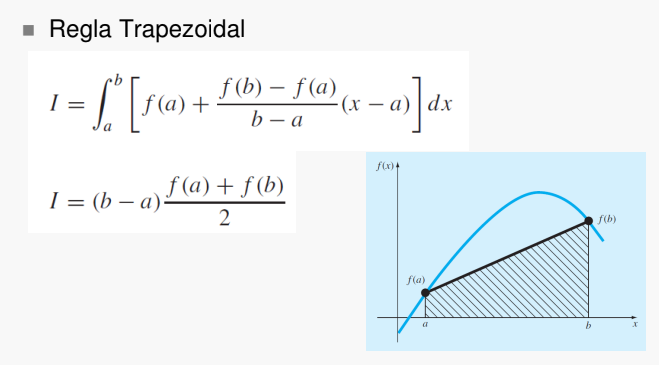

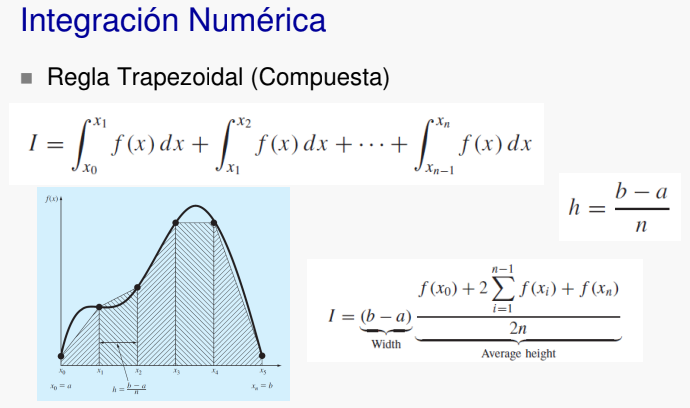

En nuestro caso:

* $n=4, a=0.0 , b=0.8$

* $h = \frac{0.8-0}{4} = 0.2$

* $I = \displaystyle ∫_{0.0}^{0.2}f(x)dx + ∫_{0.2}^{0.4}f(x)dx + ∫_{0.4}^{0.6}f(x)dx + ∫_{0.6}^{0.8}f(x)dx$

* $ I = (0.8-0) \frac{f(x_0) + 2\displaystyle\sum_{i=1}^{4-1} f(x_i) + f(x_4)}{2*4} =  (0.8) \frac{f(x_0) + 2\displaystyle\sum_{i=1}^{3} f(x_i) + f(x_3)}{8}$



###Código


In [ ]:
# Obtiene la diferencia en el eje X de los segmentos que se usan en la regla trapezoidal
def difIntervalo(a,b,n):
    h = float(float(b) - float(a))
    h /= float(n)
    return h

# No usado por falta de precisión, debe obtener cada intervalo de segmento de integración
def obtenerXs(a,b,n):
    h = difIntervalo(a,b,n)
    X = []
    i = a
    while i <= b:
        X.append(round(i,1)) # Cuando i=0.4 y h=0.2
        i = i + h # Da como resultado 0.6000000000000001 en vez de 0.6, y no se por que
    return X

X = obtenerXs(0.0, 0.8, 4.0)
print(X) ## No se porque lo muestra asi, por eso no use este metodo

[0.0, 0.2, 0.4, 0.6, 0.8]


In [ ]:
# Evalua el x recibido en la función
def f(x):
    y = 0.2
    y += (25 * x)
    y += ((-200) * pow(x,2))
    y += (675 * pow(x,3))
    y += ((-900) * pow(x,4))
    y += (400 * pow(x,5))
    return y

In [ ]:
# Recibe una lista de x a evaluar.
# Evalua cada x en la función guardandolo en una lista.
# La posicion de cada x evaluado es la misma que tienen los x en la lista recibida.
# Retorna la lista con los x evaluados en la función.
def funcionDeXs(X):
    fX = []
    for i in X:
        fX.append(f(i))
    return fX

In [ ]:
# La sumatoria de cada elemento en el arreglo
def sumatoria(fX):
    n = len(fX)
    sum = 0
    for i in range(int(n)):
        sum += fX[i]
    return sum

In [ ]:
def calcularAproximacionIntegral(a, b, n):
    # Calcular las x a evaluar
    X = obtenerXs(a, b, n)

    # Obtener el valor evaluando cada x
    fX = funcionDeXs(X)

    # Lo que multiplica a la fracción 
    producto = (b-a) 
    
    # Parte sin sumatoria del numerador
    numerador = fX[0]
    numerador += fX[int(n)-1]
    # Parte con sumatoria del numerador
    suma = sumatoria( fX[1:int(n)-1] ) # Envia los "x=1 to n-2" evaluados. 
    suma *= 2
    # Uniendo las partes del numerador
    numerador += suma

    # El denominador de la fracción
    denominador = 2 * n

    # Uniendo la integral
    integral = float(producto)
    integral *= float(numerador)
    integral /= float(denominador)
    return integral

###Respuesta.

In [ ]:
a = 0.0; b = 0.8; n = 4.0

I = calcularAproximacionIntegral(a, b, n)

print(f"La Integral de la función, aproximada con la regla de Trapezoidal (usando [{a} , {b}] de limites de integración y 4 segmentos), es: \n\n" +
      f"    Integral = {I}")

La Integral de la función, aproximada con la regla de Trapezoidal (usando [0.0 , 0.8] de limites de integración y 4 segmentos), es: 

    Integral = 1.1151999999999977


###Error.

In [ ]:
Valor_Verdadero = 1.640533 # Este lo puso el profe en el pdf de la clase (el ejercicio usa la funcion de ejemplo del pdf).

Error = Valor_Verdadero - I

Error_relativo_porcentual = (Error/Valor_Verdadero)*100

print(f"Presenta un {Error_relativo_porcentual}\% de error respecto al valor real.")
print(f"El error es de {Error}.")

Presenta un 5.091820768006717\% de error respecto al valor real.
El error es de 0.08353300000000363.
